In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn import datasets, linear_model, model_selection
%config InlineBackend.figure_format = 'retina'

%matplotlib inline

In [2]:
X = np.array([16, 17, 18, 19, 22, 25, 30, 36, 40, 47]).reshape(-1, 1)  # ages
y = np.array([10, 12, 17, 20, 21, 24, 22, 27, 33, 38])  # cigarettes_per_day

In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=25, random_state=0)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
X, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=25, random_state=0)

model = linear_model.LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)
residuals = y - y_pred

R_SQUARED = metrics.r2_score(y, y_pred) # or -> model.score(X, y)
SSR = np.sum(residuals**2)
MAE = metrics.mean_absolute_error(y, y_pred)
MSE = metrics.mean_squared_error(y, y_pred)


The Coefficient of determination `R-squared` value calculated by the linear regression model is a measure of how well the independent variable(s) explain the variation in the dependent variable. 
</br>
In this context, the R-squared value is calculated based on the relationship between the actual values of the dependent variable (y) and the predicted values of the dependent variable (y_hat) produced by the model.

The formula for R-squared is:

$[ R^2 = 1 - \frac{{\text{SST}}}{{\text{SSR}}} ]$

In this formula:
- $( R^2 )$ represents the R-squared value.
- SST (Total Sum of Squares) is the sum of the squared differences between the actual values of the dependent variable and its mean.
- SSR (Sum of Squared Residuals) is the sum of the squared differences between the actual values of the dependent variable and the predicted values from the regression model.

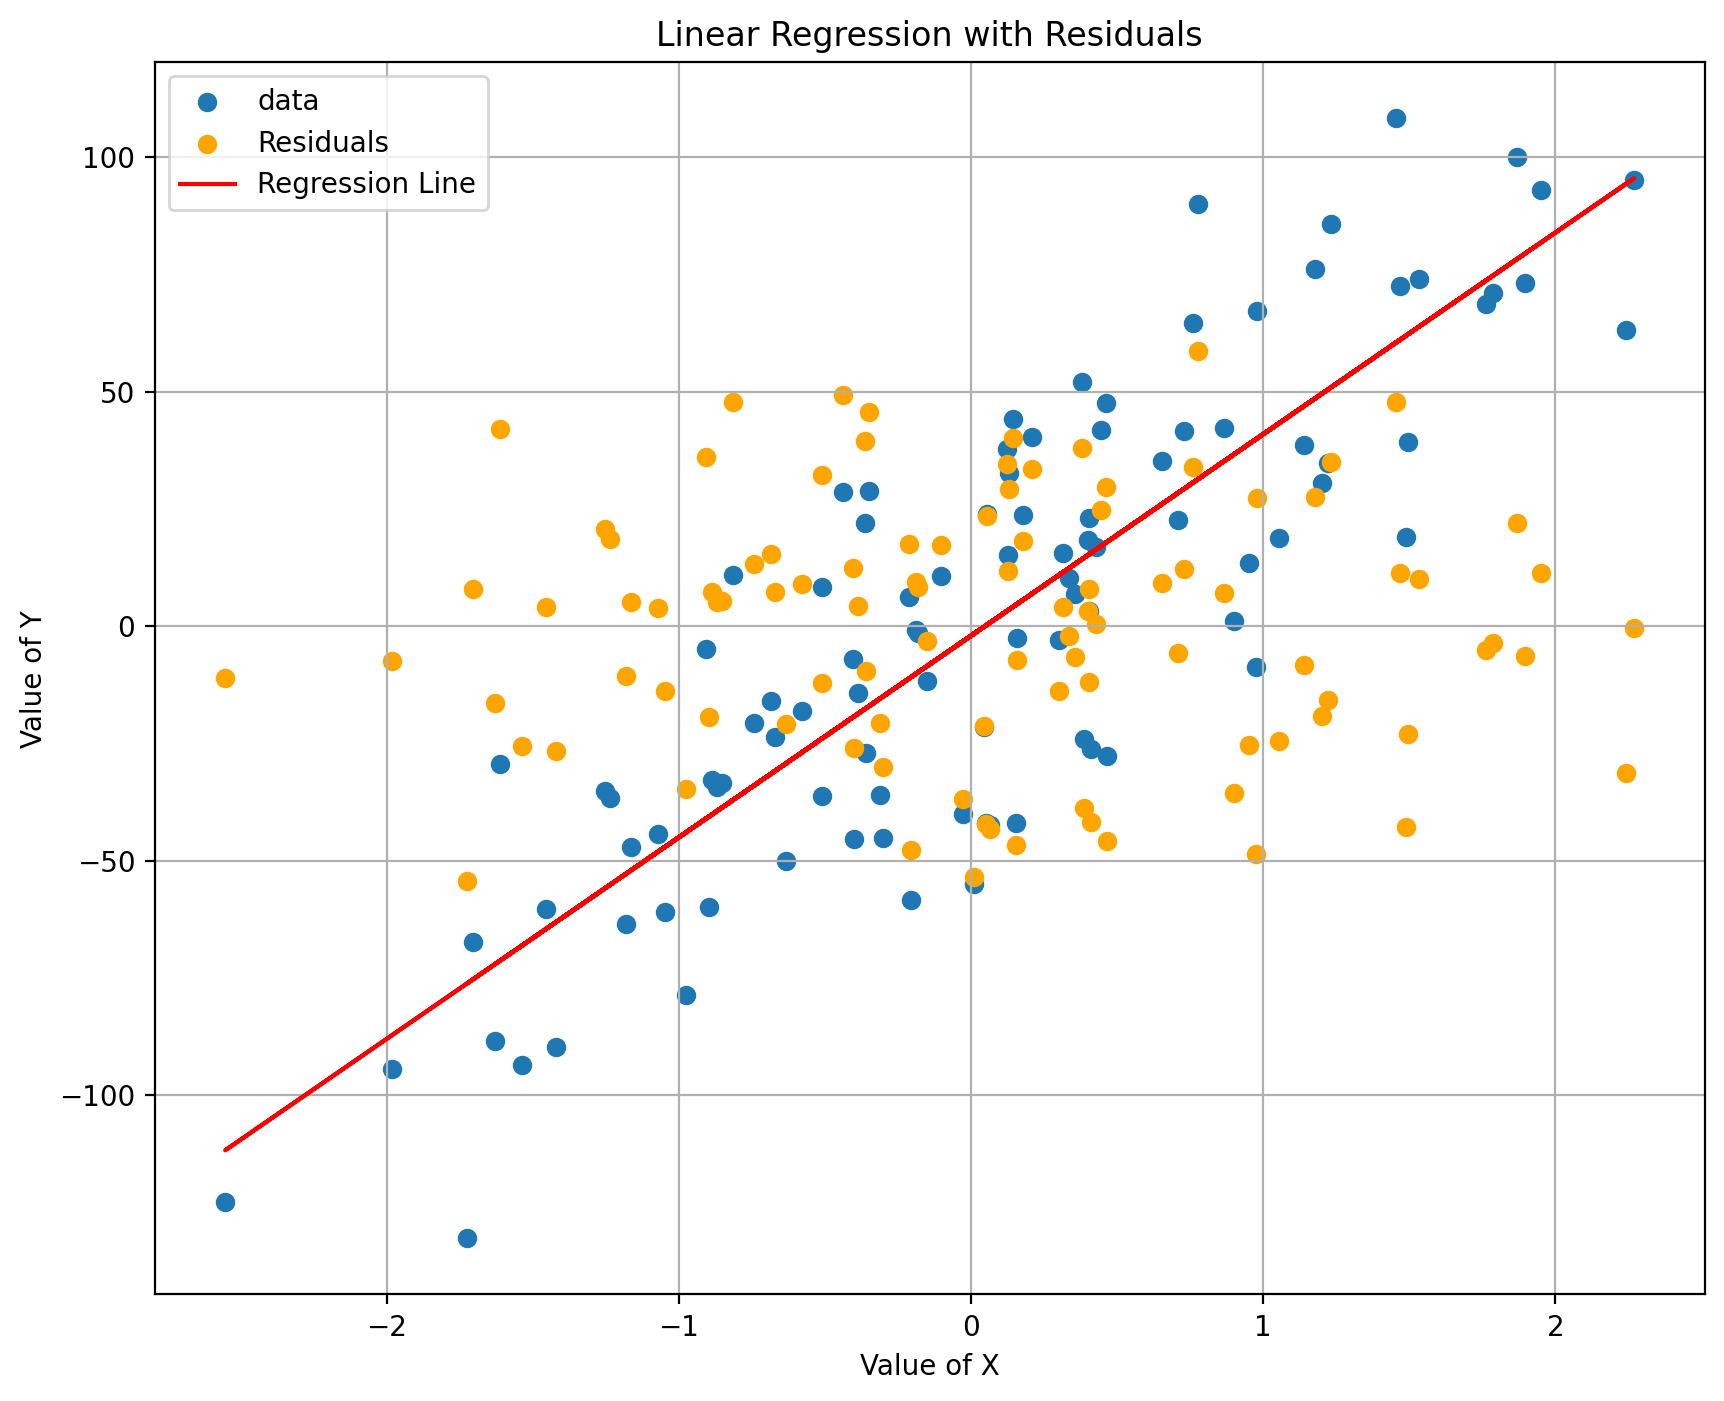

Intercept -2.0354545675768136
Coefficients : 42.9703184446904
Coefficient of determination 0.72
Mean squared error: 713.57


In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X, y, label="data")
ax.scatter(X, residuals, color="orange", label="Residuals")
plt.plot(X, y_pred, color="red", label="Regression Line")
ax.set_title("Linear Regression with Residuals")
ax.set_xlabel("Value of X")
ax.set_ylabel("Value of Y")
ax.grid()
ax.legend()
plt.show()

print(f"Intercept {model.intercept_}")
print("Coefficients :", model.coef_[0])
print(f"Coefficient of determination {R_SQUARED:.2f}")
print(f"Mean squared error: {MSE:.2f}")

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


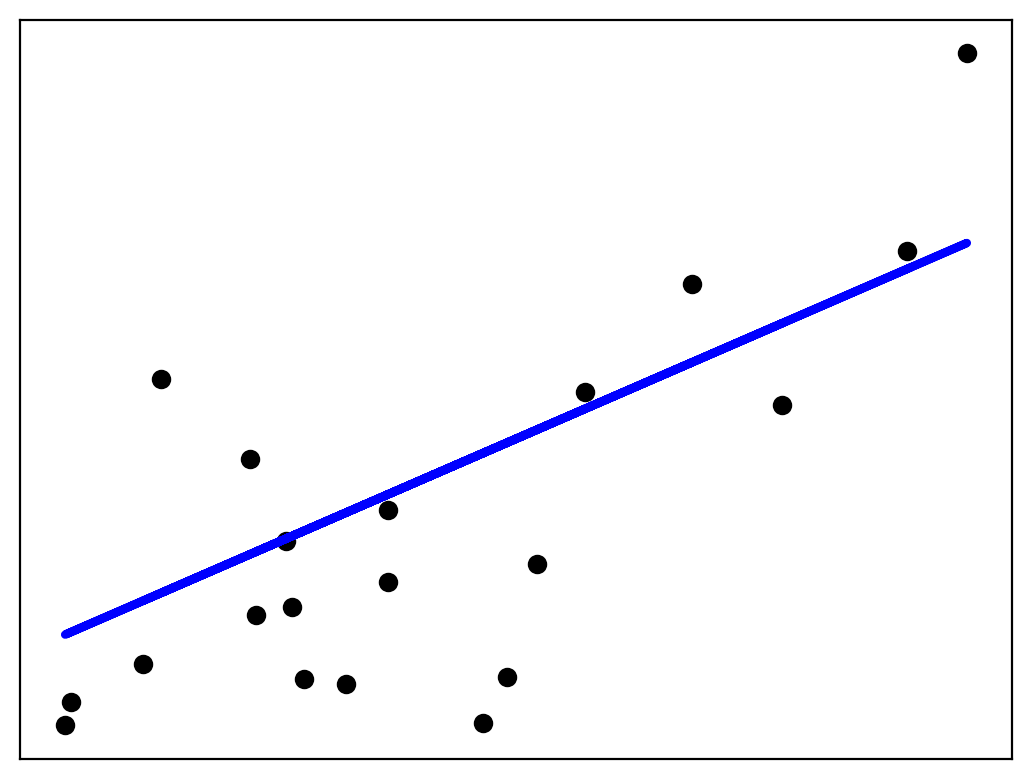

In [6]:

# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

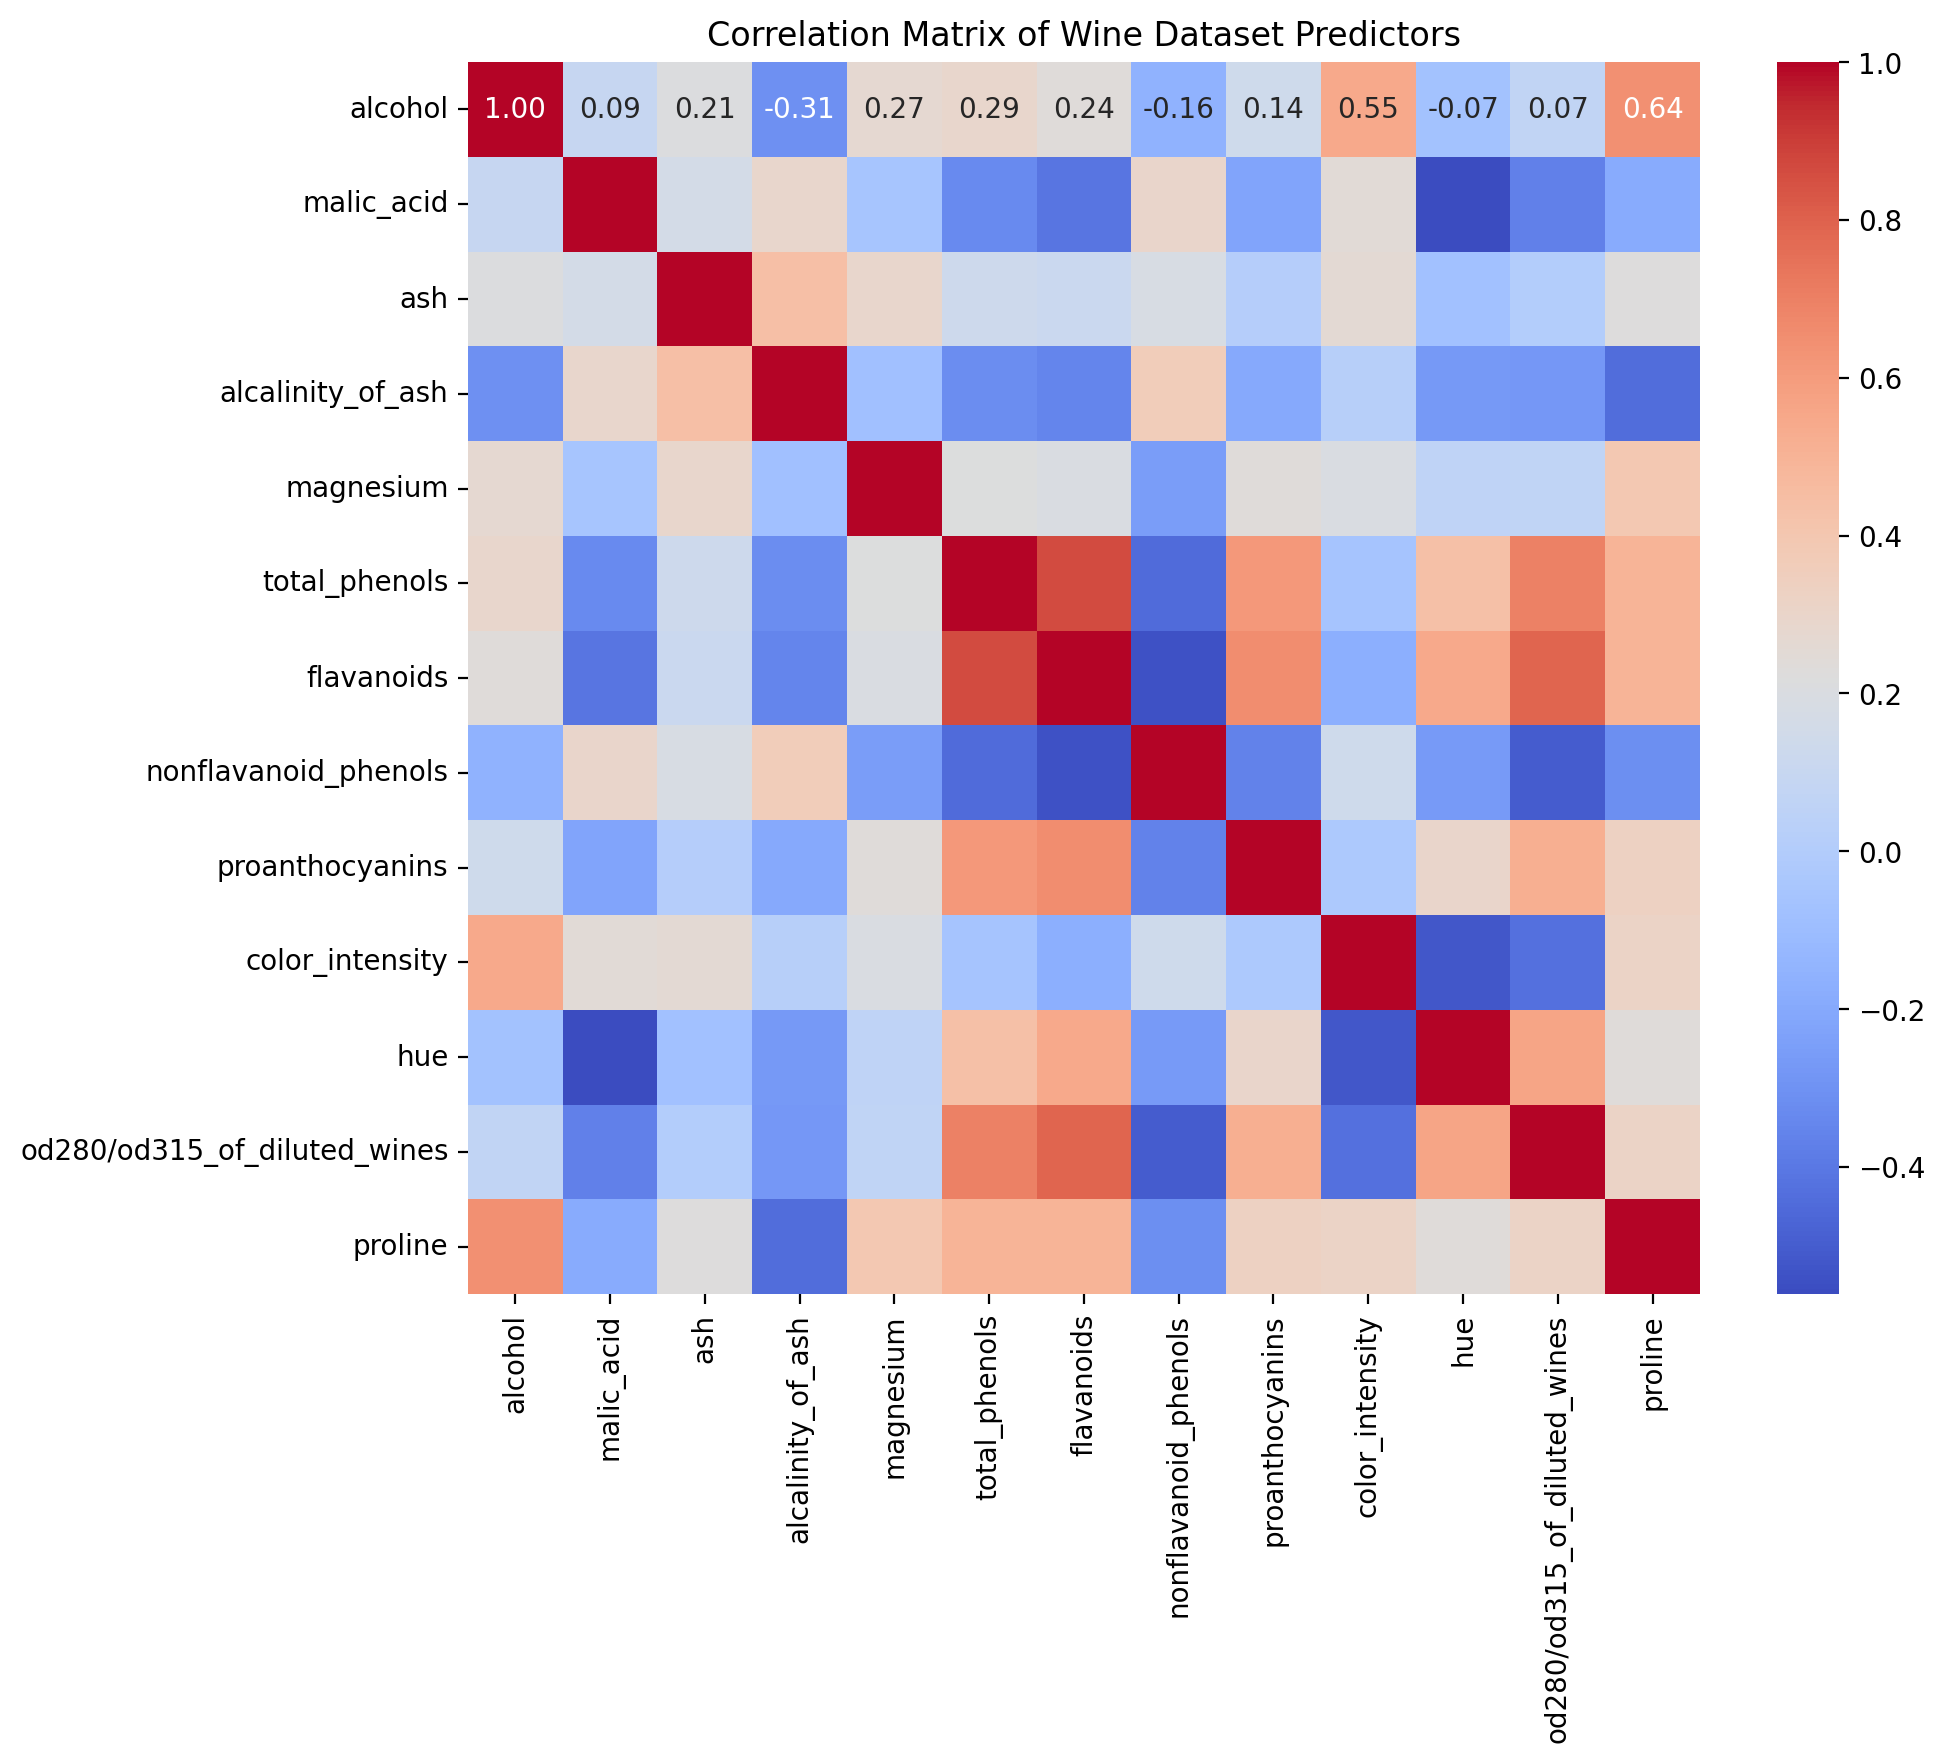

In [10]:
wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Wine Dataset Predictors")
plt.show()